<a href="https://colab.research.google.com/github/Uliana-san/Japan/blob/master/%D0%9F%D0%B0%D1%80%D1%81%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ПЕРЕД НАЧАЛОМ ИСПОЛЬЗОВАНИЯ СДЕЛАЙТЕ КОПИЮ ЭТОГО НОУТБУКА** <br>
ФАЙЛ -> Сохранить копию на Диске -> Открыть в новой вкладке

**Корпусный анализ комменатриев в социальных сетях**

*Докладчик: Никита Маткин, аналитик Центра маркетинга и коммуникаций, исследователь, студент магистратуры "Цифровые методы в гуманитарных науках"*

**Сайт**: https://perm.hse.ru/marathon/2022/ <br>
**VK**: https://vk.com/homodigitus2022 <br>
**Telegram**: https://t.me/homodigitus <br>

**Структура мастер-класса**

1.   Знакомство с [VK API](https://dev.vk.com/reference)
2.   Работа с парсером (программой для сбора комментариев)
3.   Частотный анализ комментариев в программе [Voyant Tools](https://voyant-tools.org/)

Необходимо иметь аккаунт в VK и на Google-диск.


**Зачем нужно анализировать виртуальные сообщества?**


1.   Анализ образа города/бренда/профессии
2.   Описание языка
3.   Выявление троллей и спамеров в сообществе
4.   Изучение различных мнений по поводу медиасобытий
5.   Сохранение мнений <br>
и т.д. 

**Парсинг** — это процесс автоматического сбора данных и их структурирования. Комментарии сложно собирать руками. Для сбора комментариев существуют различные парсеры:

*   [Target Hunter](https://targethunter.ru/)
*   [Pepper.ninja ](https://pepper.ninja/)
*   [Barkov.net](https://vk.barkov.net/)
*   [Церебро таргет](https://церебро.рф/)

**Плюсы**: Быстро, не надо навыков программирования <br>
**Минусы**: Дорого, не всегда справляются на 100%


Парсеры работают через [VK API](https://dev.vk.com/reference) – это интерфейс, который позволяет получать информацию из базы данных vk.com с помощью c https-запросов (запросы через ссылку) к специальному серверу. Каждая функция имеет свое название и особенности (параметры). Сегодня мы будем использовать фукнции wall.get и wall.getComments. <br>

Для создания запросов необходимо понимать базовые принципы языков программирования.
Но сегодня они нам не понадобятся, потому что я всё подготовил 😇

Так как в социальной сети хранится много скрытых данных, мы можем извлечь с помощью API только то, что можем сами увидеть. Для работы с VK API необходимо создать приложение VK и получить личный ключ доступа (никому не показывайте его).

**Как создать свое приложение VK?**


1.   Заходим в [Мои приложения](https://vk.com/apps?act=manage)
2.   Нажимаем на кнопку создать
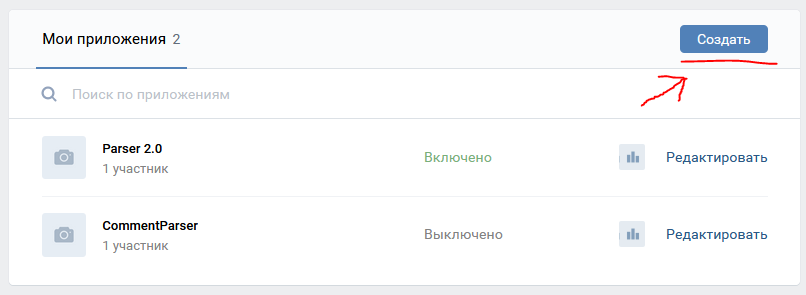

3.  Выбираем standalone-приложение и нажимаем подключить
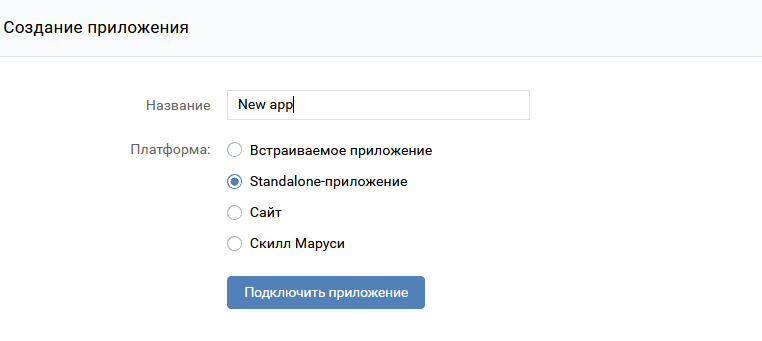

4.   Заходим в настройки
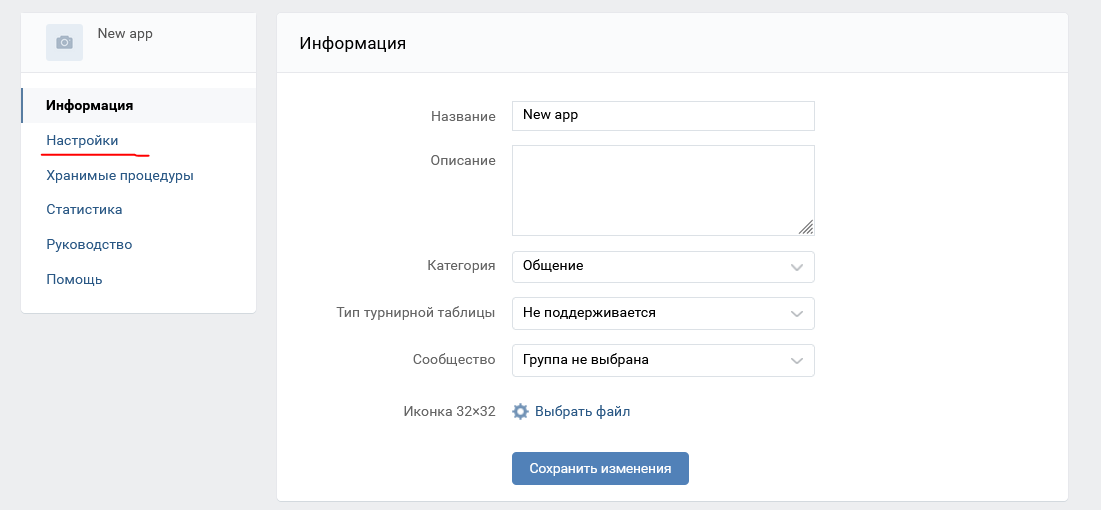

5.   Копируем id-приложения
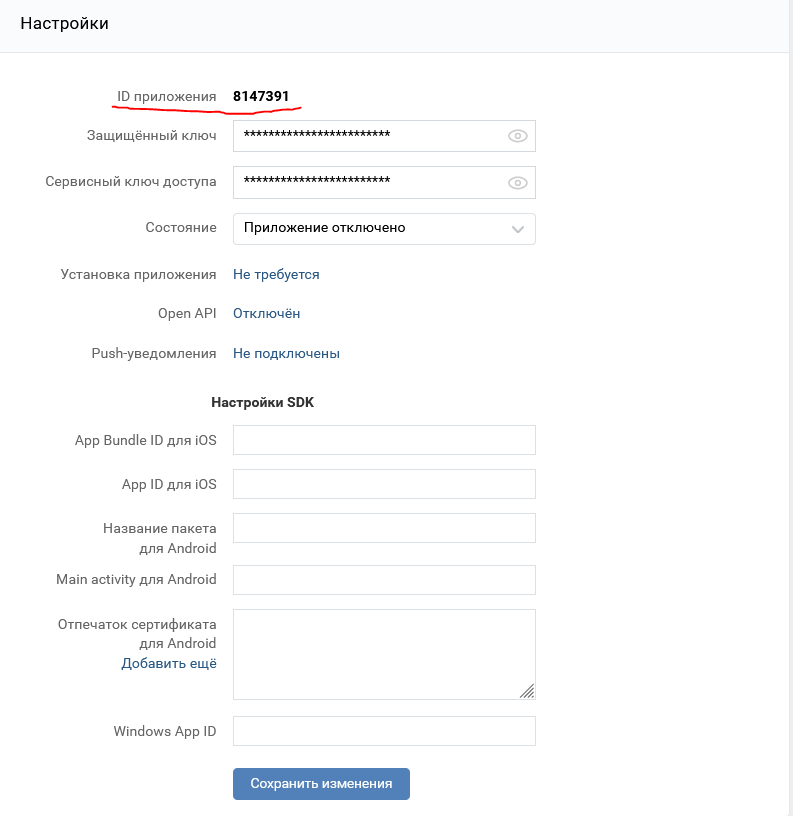

Теперь вам необходимо получить ваш ключ-доступа. Для его получения необходимо пройти по специальной ссылке. 
Не волнуйтесь, это безопасный процесс, описанный самими разработчиками VK [вот здесь](https://dev.vk.com/api/getting-started) (раздел: Авторизация пользователя).
Ключ-доступа действует 24 часа, потом необходимо получить новый ключ.

In [ ]:
#@title Вставьте id приложения сюда и нажмите слева запуск
your_id = "8150187" #@param {type:"string"}
print(f'''Ваша ссылка:
https://oauth.vk.com/authorize?client_id={your_id}&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=offline&response_type=token&v=5.131''')

Ваша ссылка:
https://oauth.vk.com/authorize?client_id=8150187&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=offline&response_type=token&v=5.131


Переходите по ссылке, дайте доступ и скопируйте ссылку из поиска.

In [ ]:
#@title Вставьте ссылку сюда:
link = "50d236bcb84719fce3e15f4d5527a78d5d08e2066b6927d29fd13fd5919ba6f55598d4817efd40a8c415c" #@param {type:"string"}
token = link[45:130]
print(f'''Ваш ключ-доступа:
{token}''')

Ваш ключ-доступа:
7d29fd13fd5919ba6f55598d4817efd40a8c415c


Теперь у вас есть доступ к парсерам. Я подготовил парсер постов и парсер комментариев. <br> Все собранные данные будут сохраняться на google.drive, поэтому необходимо дать доступ.<br>
**Важно, создайте копию кода на вашем диске и работайте в ней. Не давайте доступ к google.drive сторонним ноутбукам**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Функция дает доступ к Google.Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Парсер постов** <br>
Введите дату в формате год/месяц/день.<br>
Максимально возможная: 2020-01-01 <br>
Нажмите запуск

In [ ]:
#@title Введите даты сбора постов
import datetime
import time

date_start = "2022-04-25" #@param {type:"date"}
date_end = "2022-01-01" #@param {type:"date"}
y1, m1, d1 = list(map(int, date_start.split('-')))
y2, m2, d2 = list(map(int, date_end.split('-')))

def date_to_unix(year, month, day): #перевод даты в unix-формат
    try:
        d = datetime.date(year, month, day)
    except ValueError:
        try:
            d = datetime.date(year, month, 30)
        except ValueError:
            d = datetime.date(year, month, 28)
    unixtime = time.mktime(d.timetuple())
    return int(unixtime)

def unix_to_date(ts): #перевод даты из unix-формата в привычный
    return datetime.datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d')

Домен и Owner_id можно найти в ссылке на любой пост.
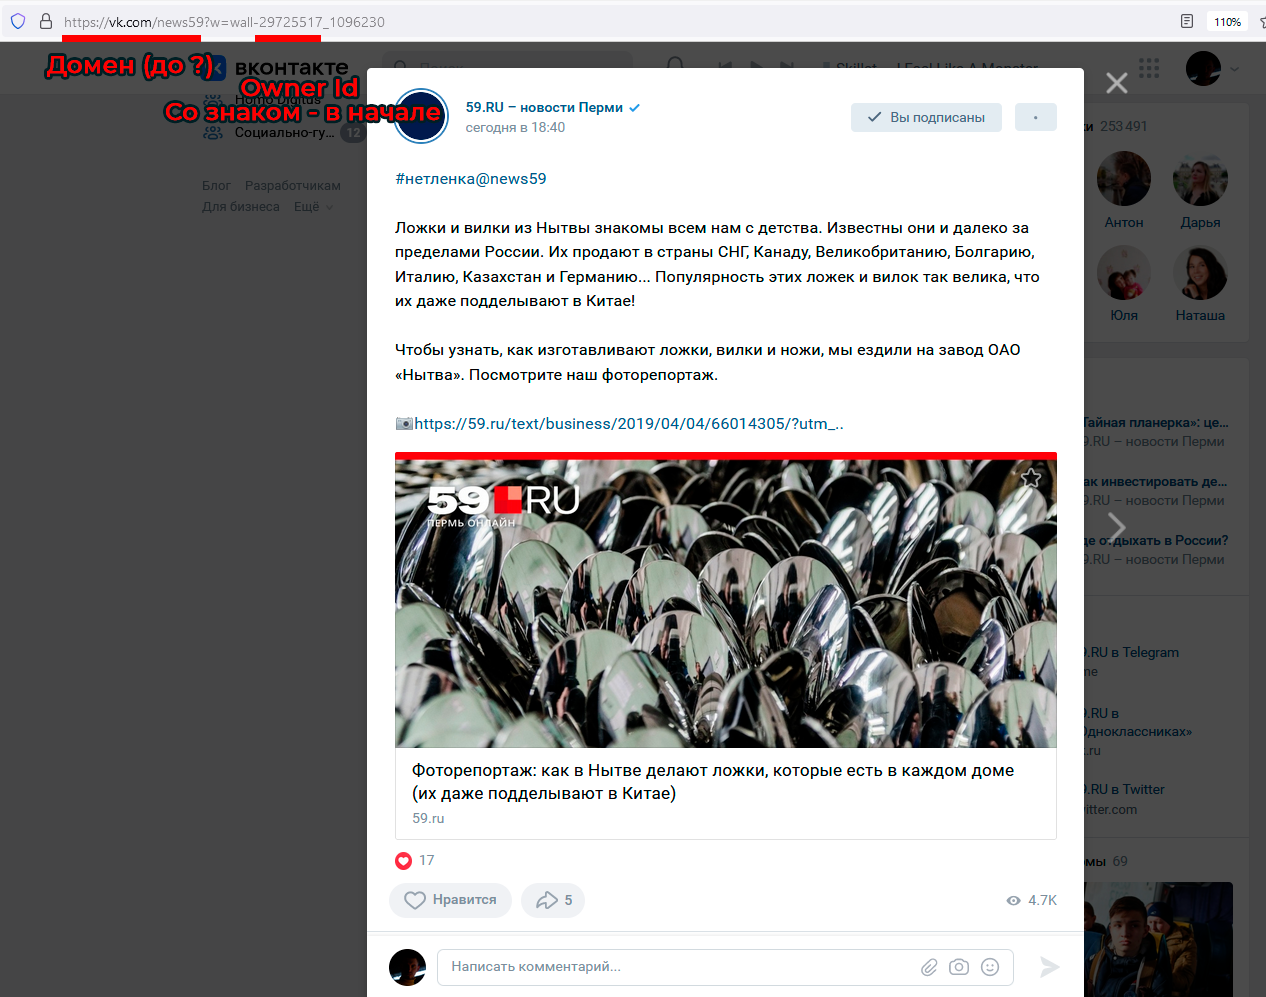

In [ ]:
#@title Парсер постов по определенной дате
import requests
import pandas as pd
from tqdm import tqdm

def get_post (token, domain, owner_id):
    version = 5.131
    offset = 0
    count = 100
    filter = 'owner'
    all_posts = {}
    for i in tqdm(range(100)): #Собираем 10000 постов. Можно поменять число на больше
        response = requests.get('https://api.vk.com/method/wall.get',
                            params = {
                            'access_token': token,
                            'v': version,
                            'owner_id': owner_id,
                            'domain': domain,
                            'count': count,
                            'offset': offset,
                            'filter': filter
                            }
                            )
        data = response.json()['response']['items']
        offset += 100
        for i in data:
            date = i['date']
            try:
                text = i['text'] + i['copy_history'][0]['text']
            except KeyError:
                text = i['text']
            all_posts[i['id']] = [text, date, i['likes']['count']]
    return all_posts

def to_df(myDict):
    df = pd.DataFrame.from_dict(myDict, orient='index',
                                columns=['text', 'date', 'likes'])
    return df

def clear_dict(myDict, y2, m2, d2, y1, m1, d1):
    ids = []
    for key, value in myDict.items():
        if date_to_unix(y2, m2, d2) < value[1] < date_to_unix(y1, m1, d1):
            value[1] = unix_to_date(value[1])
        else:
            ids.append(key)
    for key in ids:
        myDict.pop(key, None)
    return myDict

domain = "https://vk.com/podslushanoperm" #@param {type:"string"}
owner_id =  -60397113#@param {type:"number"}
#@markdown Введите домен и ID сообщества
posts_dict = get_post(token, domain, owner_id) #парсер
posts = clear_dict(posts_dict, y2, m2, d2, y1, m1, d1) #нужные даты
df = to_df(posts)
name = '/content/drive/My Drive/' + f'{domain[14:]}.csv' #создание файла
df.to_csv(name, index=False)
print(f'\n Таблица сохранилась на вашем диске под названием {domain[14:]}.csv')

100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

Файл сохранился в вашем диске под названием /podslushanoperm.csv


**Парсер комментариев**

Необходимо вставить id постов через пробел. Это должно выглядить так:
1096230 1096224 1096221 1096199
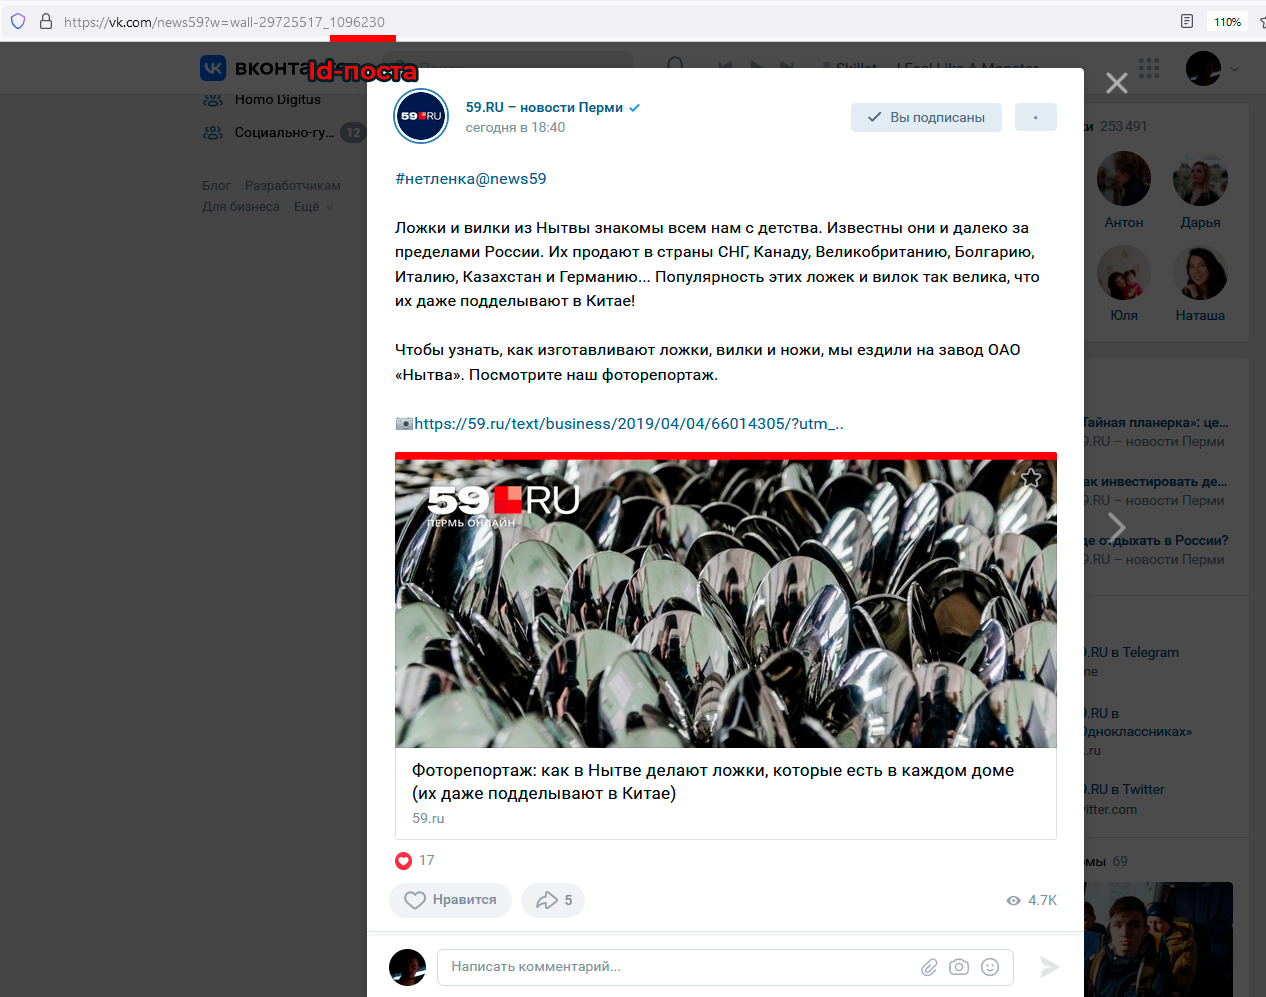

In [ ]:
#@title Парсер комментариев

import requests
import pandas as pd
from tqdm import tqdm
import datetime
import time

def unix_to_date(ts): #перевод даты из unix-формата в привычный
    return datetime.datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d')

def nes_params(all_comments): #работа с необходимыми параметрами.
    nes_dict = {}
    profiles = all_comments['profiles']
    comments = all_comments['items']
    first_string = ['NONE', 'NONE', 'NONE']
    for comment in comments:
        if len(comment['text']) > 3:
            second_string = [unix_to_date(comment['date']), comment['likes']['count'], comment['text']]
            for profile in profiles:
                if comment['from_id'] == profile['id']:
                    first_string = [profile['first_name'], profile['last_name'], profile['sex']]
            nes_dict[comment['id']] = first_string + second_string
    return nes_dict

def get_Comments(post_id, owner_id, nes_dict, token): #парсинг комментариев по id постов
    version = 5.131
    offset = 0
    count = 100
    while offset < 500:
        response = requests.get('https://api.vk.com/method/wall.getComments',
                                params={
                                    'access_token': token,
                                    'v': version,
                                    'owner_id': owner_id,
                                    'post_id': post_id,
                                    'need_likes': 1,
                                    'count': count,
                                    'offset': offset,
                                    'extended': 1
                                }
                                )
        data_comments = response.json()['response']
        tempDict = nes_params(data_comments)
        nes_dict.update(tempDict)
        offset += 100
        time.sleep(0.5)
    return nes_dict

def to_df(nes_dict): #перевод словаря в датафрейм
    df = pd.DataFrame.from_dict(nes_dict, orient='index',
                                columns=['name', 'last_name', 'sex', 'date', 'likes', 'text' ])
    return df

owner_id =  -60397113#@param {type:"number"}
post_id = "10058761 10076719 10154932 10155207 10158438 10167173 10224418 10251598 10269454 10298522 10389786 10429302 10522413 10509138" #@param {type:"string"}
#@markdown Введите ID сообщества и ID постов через пробел
nes_dict = {}
for i in tqdm(post_id.split()):
   get_Comments(i, owner_id, nes_dict, token)
df = to_df(nes_dict)
df.to_csv('/content/drive/My Drive/' + f'{owner_id}.csv', index=False)
print(f'\n Таблица сохранилась на вашем диске под названием {owner_id}.csv')

100%|██████████| 14/14 [01:02<00:00,  4.45s/it]


 Файл сохранился в вашем диске под названием -60397113.csv


В зависимости от языка и задач исследования тексты проходят предобработку. Основные этапы предобработки:


1.   Токенизация, то есть разделения текста на частички (слова, знаки пунктуации, буквы и т.д.)
2.   Превести все символы в нижний регистр
3.   Убрать ненужные символы (пунктуация, в некоторых случаях числа и эмодзи)
4.   Лемматизация, то есть привести все слова к начальной форме.
5.   Очистка от стоп-слов – наиболее частотные слова, которые мешают анализу.

In [ ]:
!pip install pymorphy2 #установим специальную библиотеку для лемматизации
!pip install emoji #и специальную библиотеку для обработки emoji

     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 8.2 MB 11.3 MB/s 
     |████████████████████████████████| 175 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6fee9d027541232f5ad18c000a71bb83b86167ee2aff8a11e562d76ddbcbfe62
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
#@title Предобработка текста
import nltk
from nltk import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
import emoji
import pandas as pd
import pymorphy2
nltk.download('stopwords')
nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words("russian")
filename = "-60397113.csv" #@param {type:"string"}
#@markdown Введите название файла в формате .csv <br>
#@markdown Пример: filename.csv <br>
#@markdown Текст файла должен быть в столбце text

def preprocessing (comment):
    tokens = word_tokenize(comment.lower())
    lemms = [morph.parse(t)[0].normal_form for t in tokens if (t.isalnum()
            or emoji.is_emoji(t))
            and t not in russian_stopwords] #эту строчку можно убрать
    return ' '.join(lemms)

df = pd.read_csv('/content/drive/My Drive/' + f'{filename}')
with open('/content/drive/My Drive/output.txt', 'w', encoding='UTF8') as f:
      for i in tqdm(df['text']):
        f.write(preprocessing(i) + '\n')
print('Файл сохранен на ваш диск под названием: output.txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 331/331 [00:00<00:00, 564.40it/s]


Вы спарсили необходимые данные. Готовые файлы в формате .csv лежат на вашем Google.Drive. Вам необходимо открыть их и скопировать текст. Его необходимо сохранить в блокнот в формате .txt и формате UTF8. Для обработки текста мы используем веб-приложение [Voyant Tools](https://voyant-tools.org/)